In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, GRU, Conv1D
from tensorflow.keras.utils import pad_sequences, to_categorical
from tensorflow.keras.optimizers import Adam 

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.datasets import reuters

In [3]:
num_words = 1000
maxlen = 1000
test_split = .3

In [31]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words= num_words, test_split=test_split)

In [32]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (7859, 1000)
X_test shape:  (3369, 1000)


In [33]:
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

In [34]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=300, input_length=1000))
model.add(GRU(128, dropout=.2))
model.add(Dense(46, activation='softmax'))

c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
history = model.fit(X_train, y_train, epochs=10, validation_split=.2, batch_size=256)

Epoch 1/10


25/25 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.3380 - loss: 2.8718 - val_accuracy: 0.3575 - val_loss: 2.3414
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - accuracy: 0.4091 - loss: 2.2206 - val_accuracy: 0.4809 - val_loss: 2.0496
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 185s 6s/step - accuracy: 0.4840 - loss: 2.0007 - val_accuracy: 0.5057 - val_loss: 1.8898
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.5262 - loss: 1.8368 - val_accuracy: 0.5420 - val_loss: 1.7516
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 199s 8s/step - accuracy: 0.5627 - loss: 1.7176 - val_accuracy: 0.5738 - val_loss: 1.6889
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 225s 9s/step - accuracy: 0.5904 - loss: 1.6303 - val_accuracy: 0.5992 - val_loss: 1.5941
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 288s 12s/step - accuracy: 0.6119 - loss: 1.5827 - val_accuracy: 0.6107 - val_loss: 1.5707
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 271s 11s/step - accuracy: 0.6283 - loss: 1.5138 - val_accuracy: 0.6291 - val_loss: 1

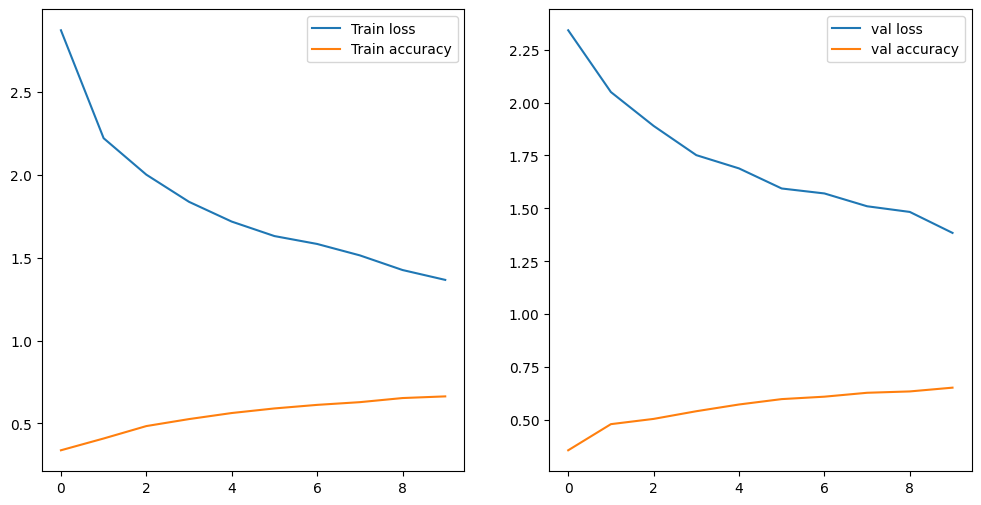

In [47]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 2, 1)
n = range(len(history.history['loss']))
ax.plot(n, history.history['loss'], label='Train loss')
ax.plot(n, history.history['accuracy'], label='Train accuracy')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(n, history.history['val_loss'], label='val loss')
ax.plot(n, history.history['val_accuracy'], label='val accuracy')
ax.legend()

plt.savefig('./results/train_result.png')

In [48]:
model.save('./models/model.keras')